In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.preprocessing import Imputer

%matplotlib inline


In [3]:
names = ['NoXPregnant', 'PlasmaGlucConc','BloodPres','TriSkinFldThk','InsulinLvl','BMI','DiabesePed','Age','ClassVar']
dataset = pd.read_csv('DiabetesDataset.csv', header=None, names=names)
print((dataset[['NoXPregnant', 'PlasmaGlucConc','BloodPres','TriSkinFldThk','InsulinLvl']] == 0).sum())

print(dataset.shape);

print(dataset.dtypes);
#general statistics of the dataset
dataset.describe()

NoXPregnant       111
PlasmaGlucConc      5
BloodPres          35
TriSkinFldThk     227
InsulinLvl        374
dtype: int64
(768, 9)
NoXPregnant         int64
PlasmaGlucConc      int64
BloodPres           int64
TriSkinFldThk       int64
InsulinLvl          int64
BMI               float64
DiabesePed        float64
Age                 int64
ClassVar            int64
dtype: object


,NoXPregnant,PlasmaGlucConc,BloodPres,TriSkinFldThk,InsulinLvl,BMI,DiabesePed,Age,ClassVar
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
dataset[['PlasmaGlucConc','BloodPres','TriSkinFldThk','InsulinLvl']] = dataset[['PlasmaGlucConc','BloodPres','TriSkinFldThk','InsulinLvl']].replace(0, np.NaN)
print(dataset.head(20))
#print(dataset.dtypes)
dataset.dropna(inplace=True)
print(dataset.shape)

    NoXPregnant  PlasmaGlucConc  BloodPres  TriSkinFldThk  InsulinLvl   BMI  \
0           6.0           148.0       72.0           35.0         NaN  33.6   
1           1.0            85.0       66.0           29.0         NaN  26.6   
2           8.0           183.0       64.0            NaN         NaN  23.3   
3           1.0            89.0       66.0           23.0        94.0  28.1   
4           NaN           137.0       40.0           35.0       168.0  43.1   
5           5.0           116.0       74.0            NaN         NaN  25.6   
6           3.0            78.0       50.0           32.0        88.0  31.0   
7          10.0           115.0        NaN            NaN         NaN  35.3   
8           2.0           197.0       70.0           45.0       543.0  30.5   
9           8.0           125.0       96.0            NaN         NaN   0.0   
10          4.0           110.0       92.0            NaN         NaN  37.6   
11         10.0           168.0       74.0          

In [13]:
print (dataset.shape)
print((dataset[['NoXPregnant', 'PlasmaGlucConc','BloodPres','TriSkinFldThk','InsulinLvl','BMI','DiabesePed','Age','ClassVar']] == 0).sum())

(336, 9)
NoXPregnant         0
PlasmaGlucConc      0
BloodPres           0
TriSkinFldThk       0
InsulinLvl          0
BMI                 0
DiabesePed          0
Age                 0
ClassVar          225
dtype: int64


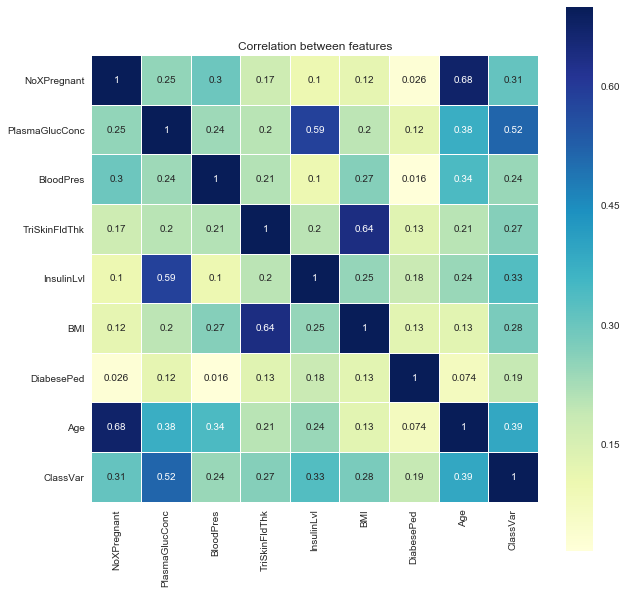

In [21]:
corr=dataset.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=0.7, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');
#dataset.corr()



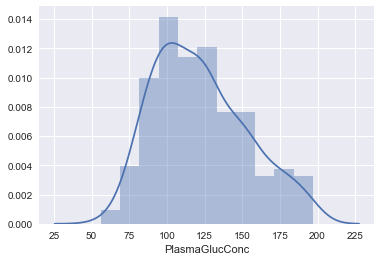

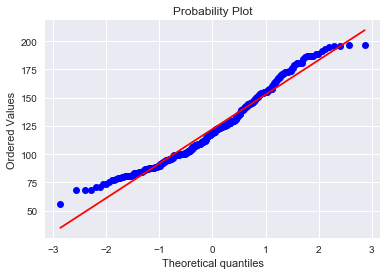

In [23]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(dataset['PlasmaGlucConc'], hist=True);
fig2 = plt.figure()
res = stats.probplot(dataset['PlasmaGlucConc'], plot=plt)